In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df=df.drop('id',axis=1)

In [16]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [18]:
df['diagnosis']=df['diagnosis'].replace({'M':1,'B':0})

/tmp/ipython-input-18-1385175471.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis']=df['diagnosis'].replace({'M':1,'B':0})


In [19]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [60]:
x.shape

(569, 30)

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_transformed=sc.fit_transform(x_train)
x_test_transformed=sc.transform(x_test)

Lets do PCA and reduce the number of components for better visualization

In [26]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [46]:
x_train_transformed=pca.fit_transform(x_train_transformed)
x_test_transformed=pca.fit_transform(x_test_transformed)

In [78]:
from sklearn.svm import SVC
model_linear=SVC(kernel='linear')
model_rbf=SVC(kernel='rbf')
model_linear.fit(x_train_transformed,y_train)
model_rbf.fit(x_train_transformed,y_train)

SVC()

plot and visualize

In [80]:
y_pred=model_linear.predict(x_test_transformed)
y_pred=y_pred.reshape(-1,1)

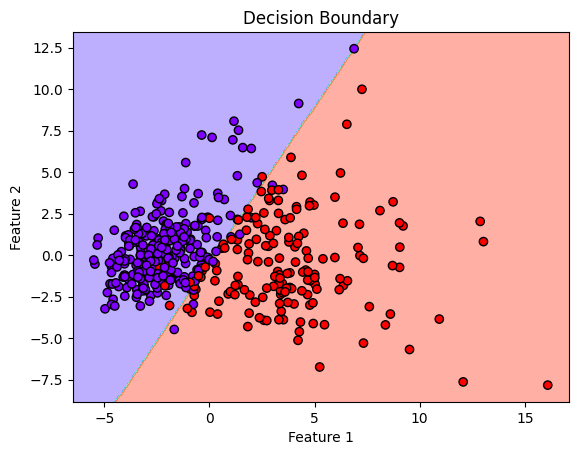

In [66]:
from sklearn.inspection import DecisionBoundaryDisplay

x_min, x_max = x_train_transformed[:, 0].min() - 1, x_train_transformed[:, 0].max() + 1
y_min, y_max = x_train_transformed[:, 1].min() - 1, x_train_transformed[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

mesh_points = np.c_[xx.ravel(), yy.ravel()]  # shape (300*300, 2)
Z = model_linear.predict(mesh_points)
Z = Z.reshape(xx.shape)  # reshape to (300, 300)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap='rainbow')

plt.scatter(x_train_transformed[:, 0], x_train_transformed[:, 1], c=y_train, cmap='rainbow', edgecolors='k')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary")
plt.show()


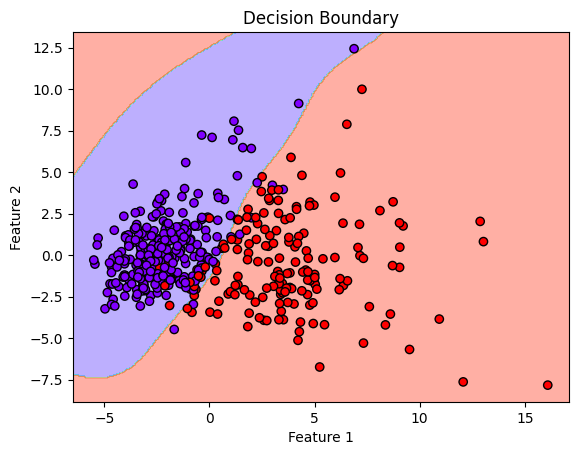

In [81]:
from sklearn.inspection import DecisionBoundaryDisplay

x_min, x_max = x_train_transformed[:, 0].min() - 1, x_train_transformed[:, 0].max() + 1
y_min, y_max = x_train_transformed[:, 1].min() - 1, x_train_transformed[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

mesh_points = np.c_[xx.ravel(), yy.ravel()]  # shape (300*300, 2)
Z = model_rbf.predict(mesh_points)
Z = Z.reshape(xx.shape)  # reshape to (300, 300)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap='rainbow')

plt.scatter(x_train_transformed[:, 0], x_train_transformed[:, 1], c=y_train, cmap='rainbow', edgecolors='k')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary")
plt.show()


HyperParameter tuning

In [82]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001],
}

In [83]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(SVC(kernel='rbf'),param_grid,verbose=3,cv=5)

In [84]:
grid.fit(x_train_transformed,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ................C=0.1, gamma=scale;, score=0.890 total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=scale;, score=0.934 total time=   0.0s
[CV 3/5] END ................C=0.1, gamma=scale;, score=0.945 total time=   0.0s
[CV 4/5] END ................C=0.1, gamma=scale;, score=0.945 total time=   0.0s
[CV 5/5] END ................C=0.1, gamma=scale;, score=0.923 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.890 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.934 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.945 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.945 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.923 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.901 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 0.1, 0.01, 0.001]},
             verbose=3)

In [86]:
print(grid.best_params_)

{'C': 100, 'gamma': 0.001}


Cross validation

In [92]:
y_pred=grid.predict(x_test_transformed)

In [94]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9736842105263158
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

